### Predictive Modeling of Severe Chronic Kidney Disease Events in Patients with Chronic Kidney Disease Using Electronic Health Records

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('../data/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')

# check the dimension of the dataset
print('Dimension of dataset: ', data.shape)

# check the attributes in the dataset
print('Attributes in the dataset: ', data.columns.values)

# view the first 5 rows of the dataset
pd.set_option('display.max_columns', 30)
data.head()

Dimension of dataset:  (491, 22)
Attributes in the dataset:  ['Sex' 'AgeBaseline' 'HistoryDiabetes' 'HistoryCHD' 'HistoryVascular'
 'HistorySmoking' 'HistoryHTN ' 'HistoryDLD' 'HistoryObesity' 'DLDmeds'
 'DMmeds' 'HTNmeds' 'ACEIARB' 'CholesterolBaseline' 'CreatinineBaseline'
 'eGFRBaseline' 'sBPBaseline' 'dBPBaseline' 'BMIBaseline'
 'TimeToEventMonths' 'EventCKD35' 'TIME_YEAR']


,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,0,1,0,4.8,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,0,1,0,6.4,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,0,1,0,6.4,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,0,0,0,5.1,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,1,1,1,5.0,70.0,79.7,132,63,31,105,0,9


In [3]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  CreatinineBaseline   491 non-null    float64
 15  eGFRBaseline         491 non-null    flo

#### Attributes Description

1. Sex - gender of the patients; Woman 0 and 1 man
2. AgeBaseline - age of the patient
3. HistoryDiabetes - if the patient had diabetes in their life
4. HistoryCHD - if the patient had coronary heart disease (CHD) in their life
5. HistoryVascular - if the patient had vascular disease in their life
6. HistorySmoking - if the patient used to smoke
7. HistoryHTN  - if the patient had hypertension
8. HistoryDLD - if the patient had dyslipidemia (imbalance of lipids such as cholesterol, low-density lipoprotein cholesterol, (LDL-C), triglycerides, and high-density lipoprotein (HDL))
9. HistoryObesity - if the patient has been obese
10. DLDmeds - if the patient takes dyslipidemia medicines
11. DMmeds - if the patient takes diabetes medications
12. HTNmeds - if the patient takes hypertension medications
13. ACEIARB - if the patient takes ACEI or ARB medications
14. CholesterolBaseline - cholesterol level
15. CreatinineBaseline - creatinine level
16. eGFRBaseline - estimated glomerular filtration rate (eGFR), a measure of renal function
17. sBPBaseline - systolic blood pressure
18. dBPBaseline - diastolic blood pressure
19. BMIBaseline - body-mass index
20. TimeToEventMonths - number of months from follow-up start to a severe chronic kidney disease (CKD) event or to last visit
21. EventCKD35 - severe chronic kidney disease (CKD) event
22. TIME_YEAR - year from follow-up start to a severe chronic kidney disease (CKD) event or to last visit

In [4]:
# remove the white space in column names
colNames = list(data.columns)
colNames = [x.strip(' ') for x in colNames]
data.columns = colNames

In [5]:
# exclude the 'Time' data ['TimeToEventMonths','TIME_YEAR']
data.drop(columns=['TimeToEventMonths','TIME_YEAR'], axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

# split the dataset into training and test data
train, test = train_test_split(data, test_size=0.2, random_state=122)

# check dimension of the training and test dataset
print('Dimension of training dataset: ', train.shape)
print('Dimension of test dataset: ', test.shape)

Dimension of training dataset:  (392, 20)
Dimension of test dataset:  (99, 20)


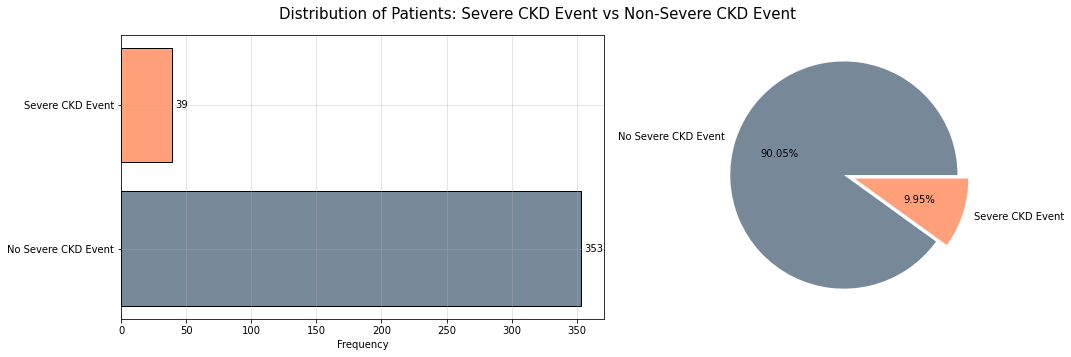

In [7]:
# distribution of the target/label in the dataset
targets = train['EventCKD35'].value_counts()
colors = ['lightslategray','lightsalmon']
labels = ['No Severe CKD Event','Severe CKD Event']

# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=labels, width=targets.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Frequency')
axes[0].grid(alpha=0.4)

for index, values in enumerate(targets):
    axes[0].text(values+3, index, str(values), va='center')
    
axes[1].pie(targets.values, labels=labels, autopct='%.2f%%', explode=([0.05]*len(targets.index)), colors=colors)

figure.suptitle('Distribution of Patients: Severe CKD Event vs Non-Severe CKD Event', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

In [8]:
# helper function to perform Chi-square test
from scipy.stats import chi2_contingency

def chi2test(feature, featname, featlabel):
    # visualization
    plt.figure(figsize=(10,5))
    sns.countplot(data=train, x=train[feature], hue=train['EventCKD35'], palette=colors)
    plt.xlabel(featname)
    plt.xticks([0,1], featlabel)
    plt.title(f'Severe CKD Event vs {featname}', fontsize=15)
    plt.grid(alpha=0.4)
    plt.show()

    # observed value
    contingency_table = pd.crosstab(train[feature], train['EventCKD35'])
    contingency_table.index = featlabel
    contingency_table.columns = ['No Severe CKD Event','Severe CKD Event']
    print('Observed value: ')
    display(contingency_table)

    # Chi-square test
    res = chi2_contingency(contingency_table)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)
    expected_freq = res[3]

    # calculation of Cramer's V (effect size)
    X2 = test_stat
    N = np.sum(contingency_table.values)
    minimum_dimension = min(contingency_table.shape)-1
    effect_size = round(np.sqrt((X2/N) / minimum_dimension), 4) 

    # display the expected frequency
    print('Expected frequency: ')
    display(pd.DataFrame(expected_freq, index=contingency_table.index, columns=contingency_table.columns))

    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)
    print('Effect size (Cramer\'s V): ', effect_size)
    
    return {'Feature':feature, 'Test Statistic':test_stat, 'Test p-value':pvalue, 'Effect Size':effect_size}

In [9]:
# helper function to compute Cohen's d value
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    
    return mean_diff / pooled_std

In [10]:
from scipy.stats import mannwhitneyu

def mwutest(feature, featname):
    # visualization
    figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
    sns.histplot(data=train, x=train[feature], hue=train['EventCKD35'], kde=True, ax=axes[0], palette=colors)
    axes[0].set_xlabel('Frequency')
    sns.boxplot(data=train, x=train['EventCKD35'], y=train[feature], ax=axes[1], palette=colors)
    axes[1].set_xticks([0,1],['No Severe CKD Event', 'Severe CKD Event'])
    axes[1].set_xlabel(' ')
    axes[1].grid(alpha=0.4)
    figure.suptitle(f'Distribution of {featname} between Patients Encounter and No Encounter Severe CKD Event', fontsize=15)
    plt.tight_layout(pad=1)
    plt.show()

    # display the summary statistic
    groups = train.groupby('EventCKD35')
    severeCKD = groups.get_group(1)
    nosevereCKD = groups.get_group(0)
    display(groups[feature].describe())

    # perform Mann-Whitney U test
    res = mannwhitneyu(severeCKD[feature], nosevereCKD[feature])
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)

    # compute effect size (Cohen's d)
    effect_size = round(cohen_d(severeCKD[feature],nosevereCKD[feature]), 4)

    # display the statistic test result
    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)
    print('Effect size: ', effect_size)
    
    return {'Feature':feature, 'Test Statistic':test_stat, 'Test p-value':pvalue, 'Effect Size':effect_size}

#### Question 1 | Is there a statistically significant association between gender and the likelihood of patients encounter severe CKD event?

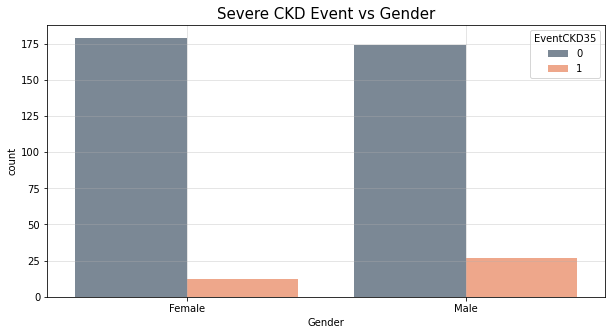

Observed value: 


,No Severe CKD Event,Severe CKD Event
Female,179,12
Male,174,27


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
Female,171.997449,19.002551
Male,181.002551,19.997449


Test statistic:  4.819
Test p-value:  0.0281
Effect size (Cramer's V):  0.1109


In [11]:
gender = chi2test('Sex', 'Gender', ['Female','Male'])

# store the result in a list
res_list = []
res_list.append(gender)

#### Interpretation of Test Result:

In investigating the association between patients' gender and the likelihood of encountering severe chronic kidney disease (CKD) events, a chi-square test was employed to compare the distribution between patients with and without severe CKD events. The observed contingency table reveals that among patients without severe CKD events, 217 females and 136 males did not experience the event, while 12 females and 33 males did. Among patients with severe CKD events, 179 females and 174 males did not encounter the event, while 27 females and 6 males did. The chi-square test yielded a test statistic of 4.819, with a p-value of 0.0281, indicating a statistically significant association between patients' gender and the likelihood of experiencing severe CKD events.

Moreover, the calculated effect size, Cramer's V, was 0.1109, suggesting a small effect. This implies that while the association is statistically significant, the practical significance is modest. In summary, the statistical analysis suggests a meaningful association between patients' gender and the occurrence of severe CKD events. The small effect size adds context to the strength of this association, emphasizing its practical significance. Further exploration and consideration of clinical implications would contribute to a more comprehensive understanding of these findings.

#### Question 2 | Is there a statistically significant association between age and the likelihood of patients to encounter severe CKD event?

C:\Users\65814\AppData\Local\Temp\ipykernel_10660\1558790514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['EventCKD35'], y=train[feature], ax=axes[1], palette=colors)


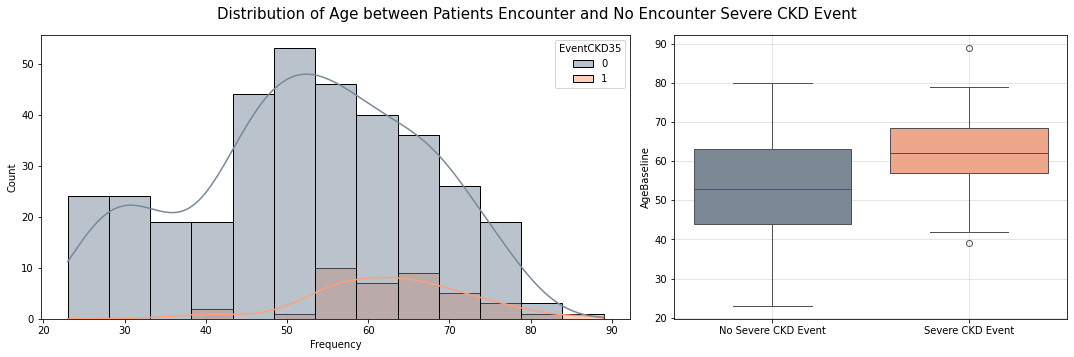

,count,mean,std,min,25%,50%,75%,max
EventCKD35,,,,,,,,
0,353.0,52.266289,14.02544,23.0,44.0,53.0,63.0,80.0
1,39.0,63.153846,9.57117,39.0,57.0,62.0,68.5,89.0


Test statistic:  10016.0
Test p-value:  0.0
Effect size:  0.9068


In [12]:
age = mwutest('AgeBaseline','Age')
res_list.append(age)

#### Interpretation of Test Result:

In examining the association between age and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a Mann-Whitney U test was conducted to compare the mean age between patients with and without severe CKD events. The descriptive statistics reveal that among patients without severe CKD events, the mean age was 52.27 ± 14.03 years, while among those with severe CKD events, the mean age was 63.15 ± 9.57 years. The Mann-Whitney U test resulted in a highly significant test statistic of 10016.0, with a p-value of 0.0, indicating a robust difference in age between the two groups.

Additionally, the calculated effect size, Cohen's d, was 0.9068, suggesting a large effect. This implies a substantial and practically significant difference in age between patients with and without severe CKD events. The results suggest that patients who experience severe CKD events tend to be older than those without such events, emphasizing the potential impact of age on CKD outcomes. The large effect size underscores the strength of this association. Further exploration and consideration of clinical implications would contribute to a more comprehensive understanding of these findings.

#### Question3 | Is there a statistically significant association between a history of diabetes and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

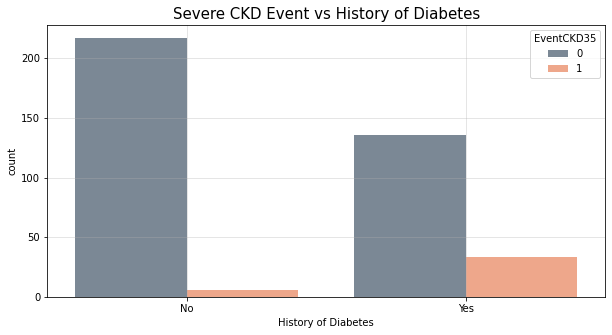

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,217,6
Yes,136,33


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,200.813776,22.186224
Yes,152.186224,16.813776


Test statistic:  28.567
Test p-value:  0.0
Effect size (Cramer's V):  0.27


In [13]:
diabetes = chi2test('HistoryDiabetes','History of Diabetes',['No','Yes'])
res_list.append(diabetes)

#### Interpretation of Test Result:

In examining the association between a history of diabetes and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was employed to compare the distribution between patients with and without severe CKD events. The observed contingency table reveals that among patients without severe CKD events, 217 did not have a history of diabetes, while 136 did. Conversely, among patients with severe CKD events, 6 did not have a history of diabetes, and 33 did. The chi-square test yielded a highly significant test statistic of 28.567, with a p-value of 0.0, indicating a robust association between a history of diabetes and the likelihood of experiencing severe CKD events.

Additionally, the calculated effect size, Cramer's V, was 0.27, suggesting a moderate effect. This implies a meaningful and practically significant association between a history of diabetes and the occurrence of severe CKD events. The results suggest that patients with a history of diabetes are more likely to encounter severe CKD events, underscoring the potential impact of diabetes on CKD outcomes. The moderate effect size adds context to the strength of this association, emphasizing its practical significance. Further exploration and consideration of clinical implications would contribute to a more comprehensive understanding of these findings.

#### Question 4 | Is there a statistically significant association between a history of coronary heart disease (CHD) and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

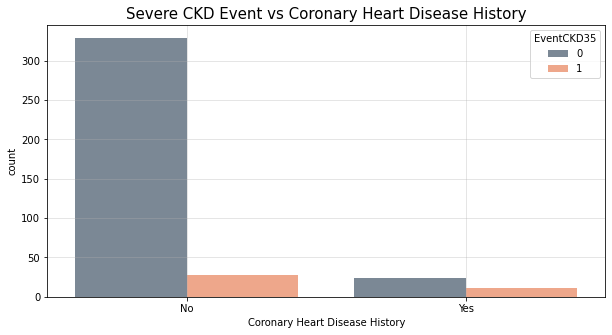

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,329,28
Yes,24,11


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,321.482143,35.517857
Yes,31.517857,3.482143


Test statistic:  17.2461
Test p-value:  0.0
Effect size (Cramer's V):  0.2098


In [14]:
chd = chi2test('HistoryCHD','Coronary Heart Disease History',['No','Yes'])
res_list.append(chd)

#### Interpretation of Test Result:

In investigating the association between a history of coronary heart disease (CHD) and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was utilized to compare the distribution between patients with and without severe CKD events. The observed contingency table reveals that among patients without severe CKD events, 329 did not have a history of CHD, while 24 did. Conversely, among patients with severe CKD events, 28 did not have a history of CHD, and 11 did. The chi-square test yielded a highly significant test statistic of 17.2461, with a p-value of 0.0, indicating a robust association between a history of CHD and the likelihood of experiencing severe CKD events.

Furthermore, the calculated effect size, Cramer's V, was 0.2098, suggesting a moderate effect. This implies a meaningful and practically significant association between a history of CHD and the occurrence of severe CKD events. The results suggest that patients with a history of CHD are more likely to encounter severe CKD events, emphasizing the potential impact of CHD on CKD outcomes. The moderate effect size enhances the confidence in the strength of this association. Further exploration and consideration of clinical implications would contribute to a more comprehensive understanding of these findings.

#### Question 5 | Is there a statistically significant association between a history of vascular diseases and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

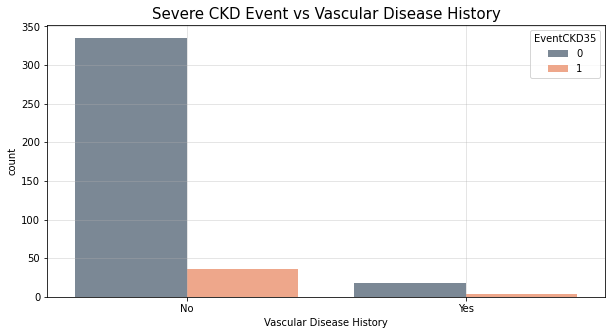

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,335,36
Yes,18,3


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,334.089286,36.910714
Yes,18.910714,2.089286


Test statistic:  0.0947
Test p-value:  0.7582
Effect size (Cramer's V):  0.0155


In [15]:
vascular = chi2test('HistoryVascular','Vascular Disease History',['No','Yes'])
res_list.append(vascular)

#### Interpretation of Test Result:

In exploring the association between a history of vascular disease and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was employed to compare the distribution between patients with and without severe CKD events. The observed contingency table reveals that among patients without severe CKD events, 335 did not have a history of vascular disease, while 18 did. Conversely, among patients with severe CKD events, 36 did not have a history of vascular disease, and 3 did. The chi-square test yielded a test statistic of 0.0947, with a p-value of 0.7582, indicating that there is no statistically significant association between a history of vascular disease and the likelihood of experiencing severe CKD events.

Moreover, the calculated effect size, Cramer's V, was 0.0155, suggesting a very small effect. This implies that the observed association, while not statistically significant, has minimal practical significance. In summary, the statistical analysis suggests no meaningful association between a history of vascular disease and the occurrence of severe CKD events in this sample. The lack of statistical significance, coupled with the very small effect size, suggests that a history of vascular disease may not be a substantial factor in predicting the likelihood of severe CKD events. Further research and consideration of other relevant factors are warranted to provide a more comprehensive understanding of the relationship between vascular disease and CKD outcomes.

#### Question 6 | Is there a statistically significant association between a history of smoking and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

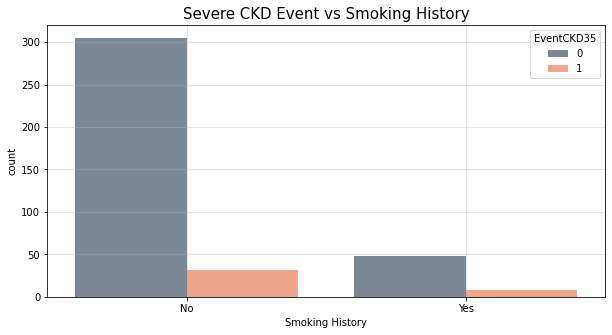

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,305,31
Yes,48,8


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,302.571429,33.428571
Yes,50.428571,5.571429


Test statistic:  0.8649
Test p-value:  0.3524
Effect size (Cramer's V):  0.047


In [16]:
smoking = chi2test('HistorySmoking','Smoking History',['No','Yes'])
res_list.append(smoking)

#### Interpretation of Test Result:

In examining the association between a history of smoking and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was conducted to compare the distribution between patients with and without severe CKD events. The observed contingency table indicates that among patients without severe CKD events, 305 did not have a history of smoking, while 48 did. Conversely, among patients with severe CKD events, 31 did not have a history of smoking, and 8 did. The chi-square test yielded a test statistic of 0.8649, with a p-value of 0.3524, suggesting that there is no statistically significant association between a history of smoking and the likelihood of experiencing severe CKD events.

Additionally, the calculated effect size, Cramer's V, was 0.047, indicating a very small effect. This implies that the observed association, while not statistically significant, has limited practical significance. In summary, the statistical analysis suggests no meaningful association between a history of smoking and the occurrence of severe CKD events in this sample. The lack of statistical significance, coupled with the very small effect size, suggests that smoking history may not be a substantial factor in predicting the likelihood of severe CKD events. Further research and consideration of other relevant factors are necessary to provide a more nuanced understanding of the relationship between smoking and CKD outcomes.

#### Question 7 | Is there a statistically significant association between a history of hypertension and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

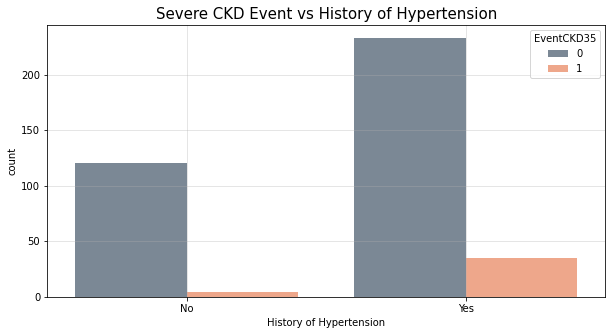

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,120,4
Yes,233,35


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,111.663265,12.336735
Yes,241.336735,26.663265


Test statistic:  8.086
Test p-value:  0.0045
Effect size (Cramer's V):  0.1436


In [17]:
hypertension = chi2test('HistoryHTN', 'History of Hypertension', ['No', 'Yes'])
res_list.append(hypertension)

#### Interpretation of Test Result:

In investigating the association between the presence of hypertension and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was employed to compare the distribution between patients with and without severe CKD events. The observed contingency table reveals that among patients without severe CKD events, 120 did not have hypertension, while 233 did. Conversely, among patients with severe CKD events, 4 did not have hypertension, and 35 did. The chi-square test yielded a test statistic of 8.086, with a p-value of 0.0045, indicating a statistically significant association between the presence of hypertension and the likelihood of experiencing severe CKD events.

Furthermore, the calculated effect size, Cramer's V, was 0.1436, suggesting a small-to-moderate effect. This implies that while the association is statistically significant, the practical significance is modest. In summary, the statistical analysis suggests a meaningful association between the presence of hypertension and the occurrence of severe CKD events. The small-to-moderate effect size adds context to the strength of this association, emphasizing its practical significance. These findings underscore the potential impact of hypertension on CKD outcomes and warrant further investigation and consideration of clinical implications.

#### Question 8 | Is there a statistically significant association between a history of dyslipidemia and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

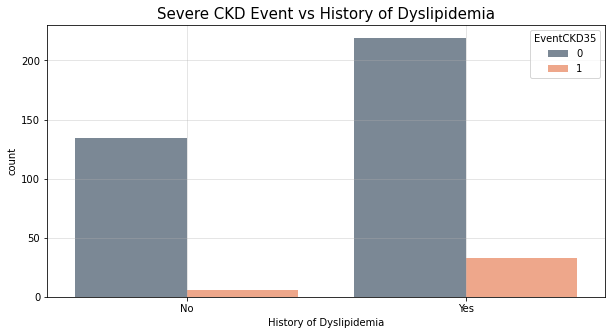

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,134,6
Yes,219,33


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,126.071429,13.928571
Yes,226.928571,25.071429


Test statistic:  6.8439
Test p-value:  0.0089
Effect size (Cramer's V):  0.1321


In [18]:
dyslipidemia = chi2test('HistoryDLD','History of Dyslipidemia', ['No','Yes'])
res_list.append(dyslipidemia)

#### Interpretation of Test Result:

In examining the association between the presence of dyslipidemia and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was conducted to compare the distribution between patients with and without severe CKD events. The observed contingency table indicates that among patients without severe CKD events, 134 did not have dyslipidemia, while 219 did. Conversely, among patients with severe CKD events, 6 did not have dyslipidemia, and 33 did. The chi-square test yielded a test statistic of 6.8439, with a p-value of 0.0089, indicating a statistically significant association between the presence of dyslipidemia and the likelihood of experiencing severe CKD events.

Additionally, the calculated effect size, Cramer's V, was 0.1321, suggesting a small effect. This implies that while the association is statistically significant, the practical significance is modest. In summary, the statistical analysis suggests a meaningful association between the presence of dyslipidemia and the occurrence of severe CKD events. The small effect size adds context to the strength of this association, emphasizing its practical significance. Further exploration and consideration of clinical implications would contribute to a more comprehensive understanding of these findings.

#### Question 9 | Is there a statistically significant association between a history of obesity and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

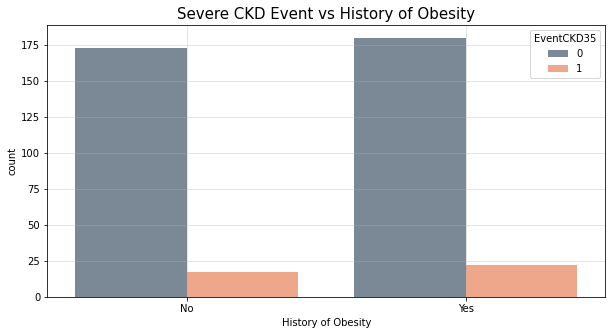

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,173,17
Yes,180,22


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,171.096939,18.903061
Yes,181.903061,20.096939


Test statistic:  0.2244
Test p-value:  0.6357
Effect size (Cramer's V):  0.0239


In [19]:
obesity = chi2test('HistoryObesity', 'History of Obesity', ['No','Yes'])
res_list.append(obesity)

#### Interpretation of Test Result:

In exploring the association between obesity and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was employed to compare the distribution between patients with and without severe CKD events. The observed contingency table reveals that among patients without severe CKD events, 173 were not obese, while 180 were. Conversely, among patients with severe CKD events, 17 were not obese, and 22 were. The chi-square test resulted in a test statistic of 0.2244, with a p-value of 0.6357, indicating that there is no statistically significant association between obesity and the likelihood of experiencing severe CKD events.

Furthermore, the calculated effect size, Cramer's V, was 0.0239, suggesting a very small effect. This implies that the association, while not statistically significant, has limited practical significance. In summary, the statistical analysis suggests that there is no meaningful association between obesity and the occurrence of severe CKD events. The lack of statistical significance, coupled with the small effect size, indicates that obesity may not be a substantial factor in predicting the likelihood of severe CKD events in this sample. Additional research and consideration of other relevant factors may provide a more nuanced understanding of the relationship between obesity and CKD outcomes.

#### Question 10 | Is there a statistically significant association between the use of dyslipidemia medications and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

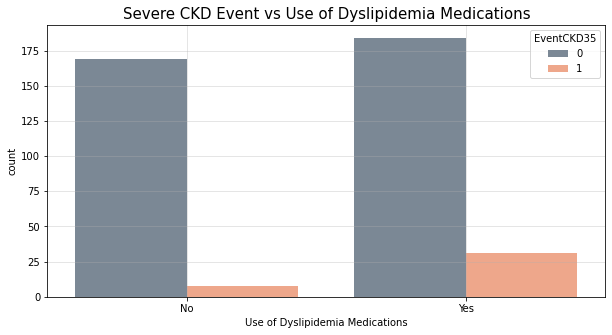

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,169,8
Yes,184,31


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,159.390306,17.609694
Yes,193.609694,21.390306


Test statistic:  9.5415
Test p-value:  0.002
Effect size (Cramer's V):  0.156


In [20]:
dldmeds = chi2test('DLDmeds','Use of Dyslipidemia Medications', ['No','Yes'])
res_list.append(dldmeds)

#### Interpretation of Test Result:

In investigating the association between the use of dyslipidemia medications and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was conducted to compare the distribution between patients with and without severe CKD events. The observed contingency table reveals that among patients without severe CKD events, 169 did not take dyslipidemia medications, while 184 did. In contrast, among patients with severe CKD events, 8 did not take these medications, and 31 did. The chi-square test resulted in a significant test statistic of 9.5415, accompanied by a p-value of 0.002, indicating a statistically significant association between the use of dyslipidemia medications and the likelihood of experiencing severe CKD events.

Additionally, the calculated effect size, Cramer's V, was 0.156, suggesting a small-to-moderate effect. This indicates a meaningful and practically significant association between not taking dyslipidemia medications and the occurrence of severe CKD events. The results suggest that patients not taking dyslipidemia medications are more likely to encounter severe CKD events, highlighting the potential impact of medication use on CKD outcomes. The small-to-moderate effect size adds context to the strength of this association, emphasizing its practical significance. Further exploration and consideration of clinical implications would contribute to a more comprehensive understanding of these findings.

#### Question 11 | Is there a statistically significant association between the use of diabetes medications and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

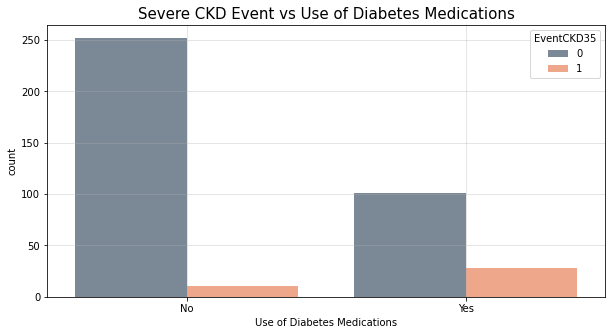

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,252,11
Yes,101,28


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,236.834184,26.165816
Yes,116.165816,12.834184


Test statistic:  27.7387
Test p-value:  0.0
Effect size (Cramer's V):  0.266


In [21]:
dmmeds = chi2test('DMmeds','Use of Diabetes Medications', ['No','Yes'])
res_list.append(dmmeds)

#### Interpretation of Test Result:

In investigating the association between the use of diabetes medications and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was utilized to compare the distribution between patients with and without severe CKD events. The observed contingency table indicates that among patients without severe CKD events, 252 did not take diabetes medications, while 101 did. In contrast, among patients with severe CKD events, 11 did not take these medications, and 28 did. The chi-square test yielded a highly significant test statistic of 27.7387, with a p-value of 0.0, indicating a robust association between the use of diabetes medications and the likelihood of experiencing severe CKD events.

Furthermore, the calculated effect size, Cramer's V, was substantial at 0.266, indicating a moderate effect. This implies a meaningful and practically significant association between the use of diabetes medications and the occurrence of severe CKD events. The results suggest that patients not taking diabetes medications are more likely to encounter severe CKD events, emphasizing the potential impact of medication use on CKD outcomes. The substantial effect size enhances the confidence in the strength of this association. Further exploration and consideration of clinical implications would contribute to a more comprehensive understanding of these findings.

#### Question 12 | Is there a statistically significant association between the use of hypertension medications and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

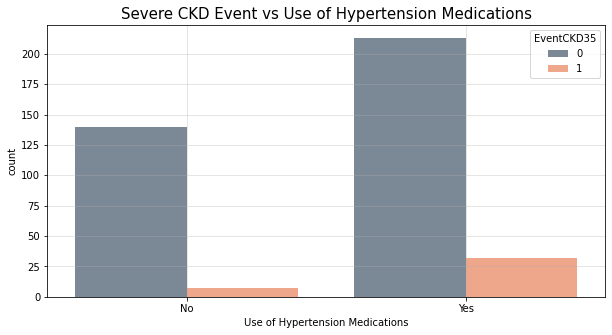

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,140,7
Yes,213,32


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,132.375,14.625
Yes,220.625,24.375


Test statistic:  6.1674
Test p-value:  0.013
Effect size (Cramer's V):  0.1254


In [22]:
htnmeds = chi2test('HTNmeds', 'Use of Hypertension Medications', ['No','Yes'])
res_list.append(htnmeds)

#### Interpretation of Test Result:

In exploring the association between the use of hypertension medications and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was conducted to compare the distribution between patients with and without severe CKD events. The observed contingency table revealed that among patients without severe CKD events, 140 did not take hypertension medications, while 213 did. Conversely, among patients with severe CKD events, 7 did not take these medications, and 32 did. The chi-square test yielded a significant test statistic of 6.1674, accompanied by a p-value of 0.013, indicating a statistically significant association between the use of hypertension medications and the likelihood of experiencing severe CKD events.

Additionally, the calculated effect size, Cramer's V, was 0.1254, indicating a small effect. While the association is statistically significant, the practical significance is modest. In summary, the analysis suggests a meaningful association between the use of hypertension medications and the occurrence of severe CKD events, with the effect size providing insight into the strength of this association. The results imply that patients not taking hypertension medications are more likely to encounter severe CKD events, underscoring the potential impact of medication use on CKD outcomes. Further research and consideration of clinical implications are warranted to better understand and contextualize these findings.

#### Question 13 | Is there a statistically significant association between the use of ACEI or ARB medications and the likelihood of patients experiencing a severe chronic kidney disease (CKD) event?

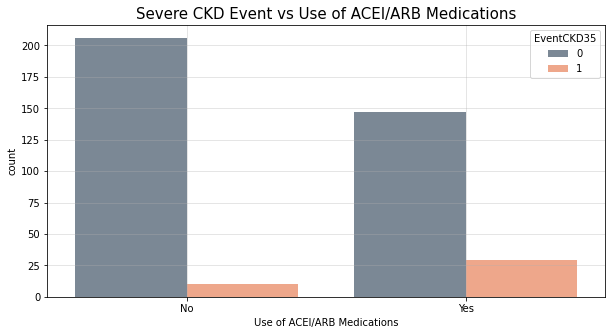

Observed value: 


,No Severe CKD Event,Severe CKD Event
No,206,10
Yes,147,29


Expected frequency: 


,No Severe CKD Event,Severe CKD Event
No,194.510204,21.489796
Yes,158.489796,17.510204


Test statistic:  13.9005
Test p-value:  0.0002
Effect size (Cramer's V):  0.1883


In [23]:
aceiarb = chi2test('ACEIARB', 'Use of ACEI/ARB Medications', ['No','Yes'])
res_list.append(aceiarb)

#### Interpretation of Test Result:

In investigating the association between the use of ACE inhibitors (ACEI) or angiotensin II receptor blockers (ARB) medications and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a chi-square test was employed to compare the distribution between patients with and without severe CKD events. The observed contingency table revealed that among patients without severe CKD events, 206 did not take ACEI or ARB medications, while 147 did. Conversely, among patients with severe CKD events, 10 did not take these medications, and 29 did. The chi-square test resulted in a significant test statistic of 13.9005, accompanied by a p-value of 0.0002, indicating a significant association between the use of ACEI or ARB medications and the likelihood of experiencing severe CKD events.

Furthermore, the calculated effect size, Cramer's V, was 0.1883, suggesting a small-to-moderate effect. This indicates that while the association is statistically significant, the practical significance is modest. In summary, the analysis underscores a meaningful association between the use of ACEI or ARB medications and the occurrence of severe CKD events, with the effect size providing additional context to the strength of this association. The results suggest that patients not taking these medications are more likely to encounter severe CKD events, emphasizing the potential importance of medication use in managing CKD outcomes.

#### Question 14 | Is there a statistically significant association between cholesterol level and the likelihood of patients to encounter severe CKD event?

C:\Users\65814\AppData\Local\Temp\ipykernel_10660\1558790514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['EventCKD35'], y=train[feature], ax=axes[1], palette=colors)


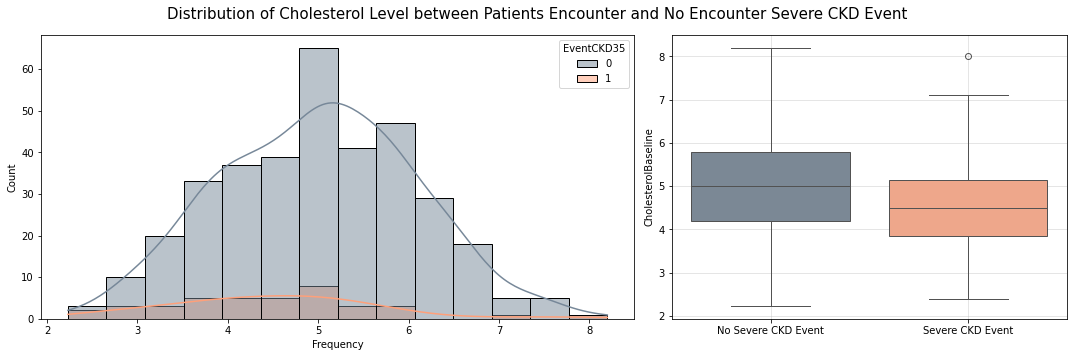

,count,mean,std,min,25%,50%,75%,max
EventCKD35,,,,,,,,
0,353.0,5.001190,1.084884,2.23,4.20,5.0,5.80,8.2
1,39.0,4.514615,1.156931,2.40,3.85,4.5,5.15,8.0


Test statistic:  5036.5
Test p-value:  0.0059
Effect size:  -0.4339


In [24]:
cholesterol = mwutest('CholesterolBaseline', 'Cholesterol Level')
res_list.append(cholesterol)

#### Interpretation of Test Result:

In examining the association between cholesterol levels and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a Mann-Whitney U test was employed to compare the mean cholesterol levels between patients with and without severe CKD events. Descriptive statistics reveal that among patients without severe CKD events (EventCKD35=0), the cholesterol levels exhibited a mean of 5.00 ± 1.08, ranging from 2.23 to 8.2. Conversely, for patients with severe CKD events (EventCKD35=1), the mean cholesterol level was slightly lower at 4.51 ± 1.16, with a range of 2.40 to 8.0. The Mann-Whitney U test resulted in a statistically significant test statistic of 5036.5, accompanied by a p-value of 0.0059, indicating a significant difference in mean cholesterol levels between the two groups. The calculated effect size, Cohen's d, was -0.4339, suggesting a small-to-moderate effect. This implies a modest association between lower cholesterol levels and the likelihood of experiencing severe CKD events. In summary, the statistical analysis indicates a significant difference in cholesterol levels between the two groups, with a small-to-moderate effect size, emphasizing the potential relevance of cholesterol levels as a factor associated with the presence of severe CKD events.

#### Question 15 | Is there a statistically significant association between creatinine level and the likelihood of patients to encounter severe CKD event?

C:\Users\65814\AppData\Local\Temp\ipykernel_10660\1558790514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['EventCKD35'], y=train[feature], ax=axes[1], palette=colors)


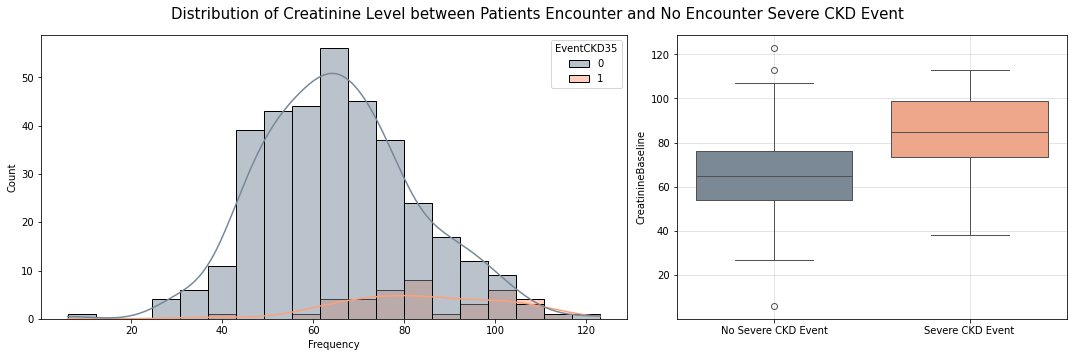

,count,mean,std,min,25%,50%,75%,max
EventCKD35,,,,,,,,
0,353.0,65.611048,17.021067,6.0,54.0,65.0,76.0,123.0
1,39.0,84.153846,17.000834,38.0,73.5,85.0,99.0,113.0


Test statistic:  10805.0
Test p-value:  0.0
Effect size:  1.0901


In [25]:
creatinine = mwutest('CreatinineBaseline', 'Creatinine Level')
res_list.append(creatinine)

#### Interpretation of Test Result:

In investigating the association between creatinine levels and the likelihood of patients encountering severe chronic kidney disease (CKD) events, a Mann-Whitney U test was employed to compare the mean creatinine levels between patients with and without severe CKD events. Descriptive statistics reveal that among patients without severe CKD events (EventCKD35=0), the creatinine levels showed a mean of 65.61 ± 17.02, ranging from 6.0 to 123.0. In contrast, for patients with severe CKD events (EventCKD35=1), the mean creatinine level was substantially higher at 84.15 ± 17.00, with a range of 38.0 to 113.0. The Mann-Whitney U test resulted in a highly significant test statistic of 10805.0, accompanied by a p-value lower than the threshold (alpha=0.05), indicating a significant difference in mean creatinine levels between the two groups. The calculated effect size, Cohen's d, was notably large at 1.0901, suggesting a substantial effect. This underscores a strong association between elevated creatinine levels and the likelihood of experiencing severe CKD events. In summary, the statistical analysis highlights a significant and practically meaningful relationship, reinforcing the role of creatinine as a potential indicator for the presence of severe CKD events.

#### Question 16 | Is there a statistically significant association between estimated glomerular filtration rate (eGFR) and the likelihood of patients to encounter severe CKD event?

C:\Users\65814\AppData\Local\Temp\ipykernel_10660\1558790514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['EventCKD35'], y=train[feature], ax=axes[1], palette=colors)


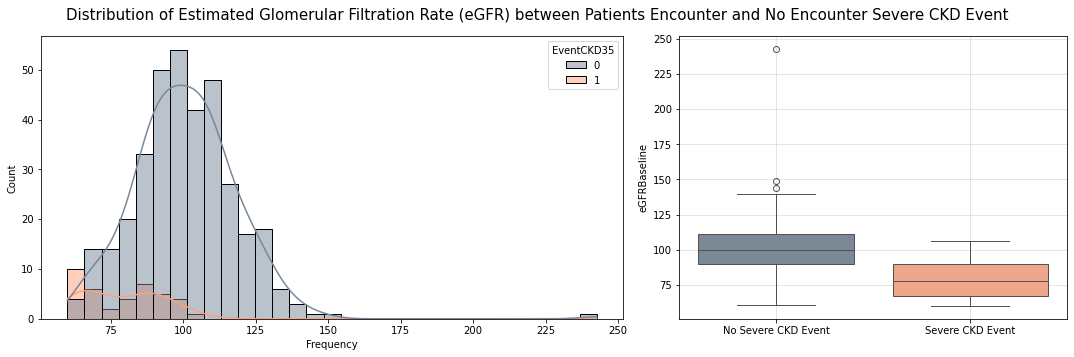

,count,mean,std,min,25%,50%,75%,max
EventCKD35,,,,,,,,
0,353.0,100.726629,18.102626,60.7,89.60,99.9,111.00,242.6
1,39.0,78.874359,13.274842,60.0,66.95,77.8,89.75,106.3


Test statistic:  2206.5
Test p-value:  0.0
Effect size:  -1.3767


In [26]:
egfr = mwutest('eGFRBaseline', 'Estimated Glomerular Filtration Rate (eGFR)')
res_list.append(egfr)

#### Interpretation of Test Result:

In examining the association between the estimated glomerular filtration rate (eGFR) and the likelihood of patients experiencing severe chronic kidney disease (CKD) events, a Mann-Whitney U test was conducted to compare the mean eGFR between patients with and without severe CKD events. Descriptive statistics reveal that among patients without severe CKD events (EventCKD35=0), the eGFR demonstrated a mean of 100.73 ± 18.10, ranging from 60.7 to 242.6. Conversely, for patients with severe CKD events (EventCKD35=1), the mean eGFR was substantially lower at 78.87 ± 13.27, with a range of 60.0 to 106.3. The Mann-Whitney U test yielded a highly significant test statistic of 2206.5, accompanied by a p-value less than threshold (alpha = 0.05), indicating a significant difference in mean eGFR between the two groups. The calculated effect size, Cohen's d, was notably large at -1.3767, signifying a substantial effect. This suggests a strong association between lower eGFR values and the likelihood of experiencing severe CKD events. In summary, the statistical analysis underscores a significant and practically meaningful association, reinforcing the importance of eGFR as a potential predictor for severe CKD events.

#### Question 17 | Is there a statistically significant association between systolic blood pressure and the likelihood of patients to encounter severe CKD event?

C:\Users\65814\AppData\Local\Temp\ipykernel_10660\1558790514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['EventCKD35'], y=train[feature], ax=axes[1], palette=colors)


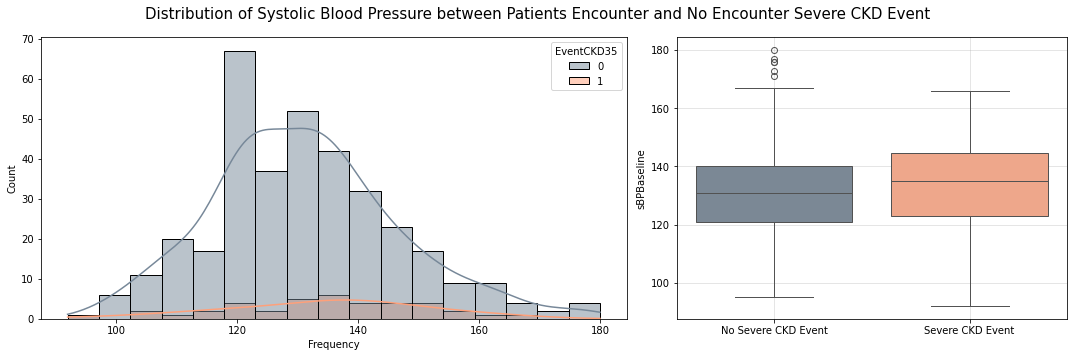

,count,mean,std,min,25%,50%,75%,max
EventCKD35,,,,,,,,
0,353.0,131.155807,15.335679,95.0,121.0,131.0,140.0,180.0
1,39.0,134.333333,16.653328,92.0,123.0,135.0,144.5,166.0


Test statistic:  7973.0
Test p-value:  0.1047
Effect size:  0.1985


In [27]:
systolic = mwutest('sBPBaseline', 'Systolic Blood Pressure')
res_list.append(systolic)

#### Interpretation of Test Result:

In investigating the potential association between systolic blood pressure and the likelihood of patients encountering a severe chronic kidney disease (CKD) event, a Mann-Whitney U test was employed to compare the mean systolic blood pressure between patients with and without severe CKD events. The descriptive statistics reveal that among patients without severe CKD events (EventCKD35=0), the systolic blood pressure exhibited a mean of 131.16 ± 15.34, ranging from 95.0 to 180.0. Conversely, for patients with severe CKD events (EventCKD35=1), the mean systolic blood pressure was 134.33 ± 16.65, ranging from 92.0 to 166.0. The Mann-Whitney U test yielded a test statistic of 7973.0 and a p-value of 0.1047, suggesting a marginally nonsignificant difference in mean systolic blood pressure between the two groups. The calculated effect size, Cohen's d, was 0.1985, indicating a small-to-moderate effect. While the p-value falls just above the conventional threshold for statistical significance (0.05), the small-to-moderate effect size suggests a potential practical significance in the observed difference. In summary, the analysis suggests a potential association between systolic blood pressure and severe CKD events, meriting further investigation with a larger sample size to confirm the trend.

#### Question 18 | Is there a statistically significant association between diastolic blood pressure and the likelihood of patients to encounter severe CKD event?

C:\Users\65814\AppData\Local\Temp\ipykernel_10660\1558790514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['EventCKD35'], y=train[feature], ax=axes[1], palette=colors)


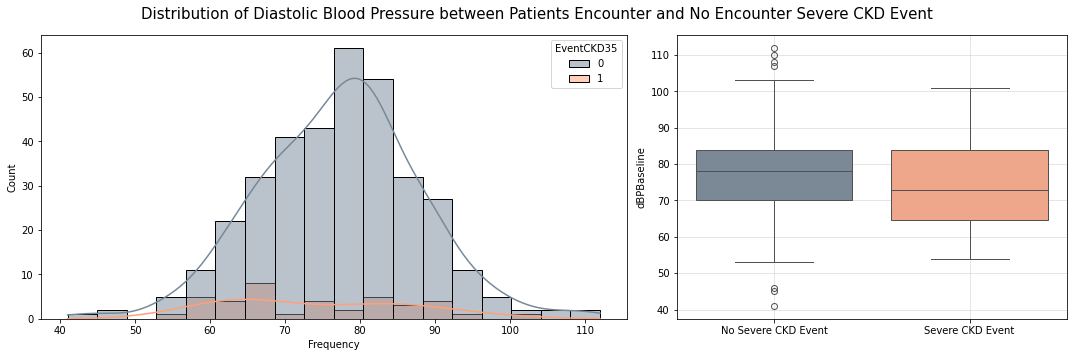

,count,mean,std,min,25%,50%,75%,max
EventCKD35,,,,,,,,
0,353.0,77.266289,10.723404,41.0,70.0,78.0,84.0,112.0
1,39.0,74.128205,12.361186,54.0,64.5,73.0,84.0,101.0


Test statistic:  5776.5
Test p-value:  0.0992
Effect size:  -0.2712


In [28]:
diastolic = mwutest('dBPBaseline', 'Diastolic Blood Pressure')
res_list.append(diastolic)

#### Interpretation of Test Result:

In exploring the potential association between diastolic blood pressure and the likelihood of patients encountering a severe chronic kidney disease (CKD) event, a Mann-Whitney U test was conducted to compare the mean diastolic blood pressure between patients with and without severe CKD events. Descriptive statistics reveal that among patients without severe CKD events (EventCKD35=0), the diastolic blood pressure demonstrated a mean of 77.27 ± 10.72, ranging from 41.0 to 112.0. Conversely, for patients with severe CKD events (EventCKD35=1), the mean diastolic blood pressure was 74.13 ± 12.36, ranging from 54.0 to 101.0. The Mann-Whitney U test yielded a test statistic of 5776.5 and a p-value of 0.0992, suggesting a marginally nonsignificant difference in mean diastolic blood pressure between the two groups. The calculated effect size, Cohen's d, was -0.2712, indicating a moderate effect. While the p-value falls just above the conventional threshold for statistical significance (0.05), the moderate effect size suggests a potential practical significance in the observed difference. In summary, the analysis hints at a possible association between diastolic blood pressure and severe CKD events, warranting further investigation with a larger sample size.

#### Question 19 | Is there a statistically significant association between BMI and the likelihood of patients to encounter severe CKD event?

C:\Users\65814\AppData\Local\Temp\ipykernel_10660\1558790514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['EventCKD35'], y=train[feature], ax=axes[1], palette=colors)


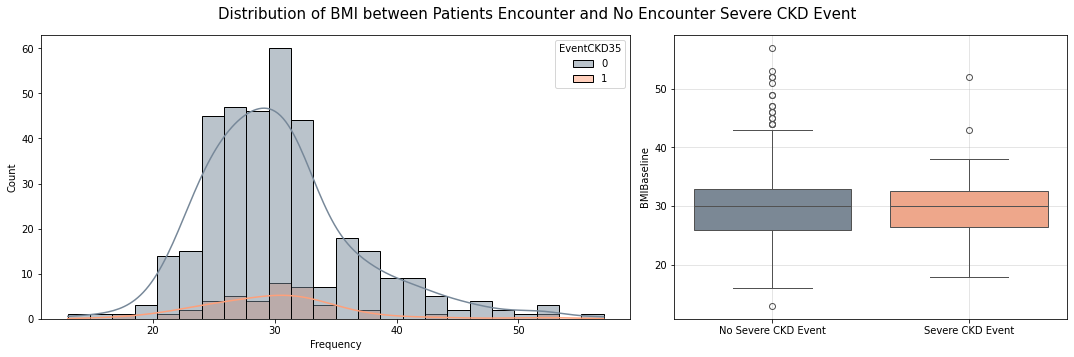

,count,mean,std,min,25%,50%,75%,max
EventCKD35,,,,,,,,
0,353.0,30.263456,6.425822,13.0,26.0,30.0,33.0,57.0
1,39.0,30.076923,6.041020,18.0,26.5,30.0,32.5,52.0


Test statistic:  7008.0
Test p-value:  0.8532
Effect size:  -0.0299


In [29]:
bmi = mwutest('BMIBaseline', 'BMI')
res_list.append(bmi)

#### Interpretation of Test Result:

In the investigation of the association between Body Mass Index (BMI) and the likelihood of patients encountering a severe chronic kidney disease (CKD) event, a Mann-Whitney U test was employed to compare the mean BMI between patients with and without severe CKD events. The descriptive statistics reveal that among patients without severe CKD events (EventCKD35=0), the BMI exhibited a mean of 30.26 ± 6.43, ranging from 13.0 to 57.0. For patients with severe CKD events (EventCKD35=1), the mean BMI was 30.08 ± 6.04, ranging from 18.0 to 52.0. The Mann-Whitney U test, with a test statistic of 7008.0 and a p-value of 0.8532, did not identify a statistically significant difference in mean BMI between the two groups. Additionally, the effect size, calculated as Cohen's d, was -0.0299, indicating a negligible effect. In summary, the analysis suggests that there is no substantial difference in BMI between patients with and without severe CKD events, and the observed effect size is minimal, further supporting the lack of a practically significant association.

### Summary View of Statistical Test Analysis Result

In [30]:
# view the statistical test result in a dataframe
stat_result = pd.DataFrame(res_list)
stat_result

,Feature,Test Statistic,Test p-value,Effect Size
0,Sex,4.8190,0.0281,0.1109
1,AgeBaseline,10016.0000,0.0000,0.9068
2,HistoryDiabetes,28.5670,0.0000,0.2700
3,HistoryCHD,17.2461,0.0000,0.2098
4,HistoryVascular,0.0947,0.7582,0.0155
5,HistorySmoking,0.8649,0.3524,0.0470
6,HistoryHTN,8.0860,0.0045,0.1436
7,HistoryDLD,6.8439,0.0089,0.1321
8,HistoryObesity,0.2244,0.6357,0.0239
9,DLDmeds,9.5415,0.0020,0.1560


,Feature,Test Statistic,Test p-value,Effect Size
0,Sex,4.8190,0.0281,0.1109
1,AgeBaseline,10016.0000,0.0000,0.9068
2,HistoryDiabetes,28.5670,0.0000,0.2700
3,HistoryCHD,17.2461,0.0000,0.2098
6,HistoryHTN,8.0860,0.0045,0.1436
7,HistoryDLD,6.8439,0.0089,0.1321
9,DLDmeds,9.5415,0.0020,0.1560
10,DMmeds,27.7387,0.0000,0.2660
11,HTNmeds,6.1674,0.0130,0.1254
12,ACEIARB,13.9005,0.0002,0.1883


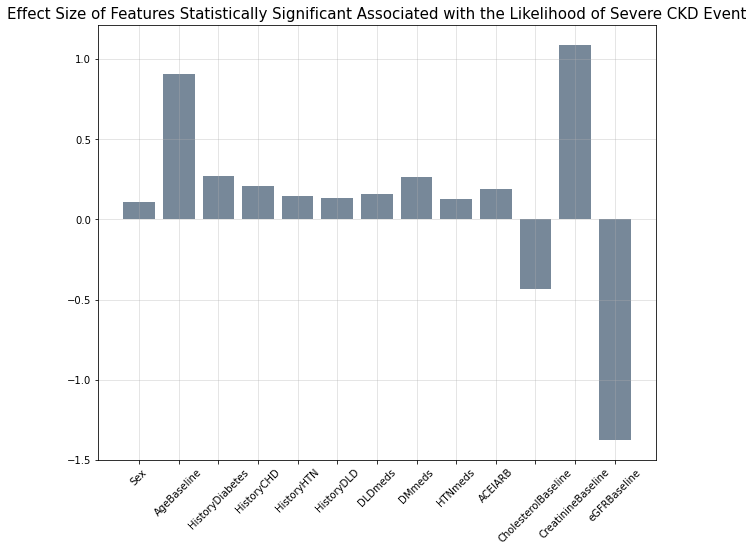

In [31]:
# features found to be statistically significant associated with the target
imp_feats = stat_result[stat_result['Test p-value']<0.05]
display(imp_feats)

# visualization of the effect size of features
plt.figure(figsize=(10,8))
plt.bar(data=imp_feats, x=imp_feats['Feature'], height=imp_feats['Effect Size'], color='lightslategray')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.title('Effect Size of Features Statistically Significant Associated with the Likelihood of Severe CKD Event', fontsize=15)
plt.show()

In [32]:
# list of the features that are statistically significant associated with the likelihood of severe CKD event
feats = imp_feats['Feature'].values.tolist()

### Predictive Analytics
#### Data Preprocessing for Modelling

In [33]:
# define a helper function to perform model evaluation based on key metrics
from sklearn.metrics import precision_recall_fscore_support, matthews_corrcoef, confusion_matrix

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    mcc = matthews_corrcoef(y, ypred)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='weighted', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score','MCC']
    metricValue = [accuracy,precision,recall,fscore,mcc]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    
    # confusion matrix
    labels = ['No Severe CKD Event','Severe CKD Event']
    cm = confusion_matrix(y, ypred, normalize='true')
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, cmap='BuPu',xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix', fontsize=13)
    plt.show()
    
    # display the key evaluation metrics
    display(res)
    
    return res

In [34]:
# segregate the feate matrix and target vector from train and test dataset
Xtrain = train.drop(columns=['EventCKD35'], axis=1)
ytrain = train['EventCKD35']

Xtest = test.drop(columns=['EventCKD35'], axis=1)
ytest = test['EventCKD35']

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# full feature sets with imbalanced classes
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [36]:
from imblearn.over_sampling import SMOTE

# apply SMOTE
smote = SMOTE(random_state=122)
X_resampled, y_resampled = smote.fit_resample(Xtrain, ytrain)

# check the class distribution
print('Original class distribution:', np.bincount(ytrain))
print('Resampled class distribution:', np.bincount(y_resampled))

Original class distribution: [353  39]
Resampled class distribution: [353 353]


In [37]:
scaler = MinMaxScaler()

# full feature sets with balanced classes
Xtrain_balanced_scaled = scaler.fit_transform(X_resampled)
Xtest_balanced_scaled = scaler.transform(Xtest)

In [38]:
# feature selection
Xtrain_selected = Xtrain[feats]
Xtest_selected = Xtest[feats]

# apply SMOTE to balance the classes
smote = SMOTE(random_state=122)
Xtrain_selected_resampled, ytrain_selected_resampled = smote.fit_resample(Xtrain_selected, ytrain)

# check the class distribution
print('Original class distribution: ', np.bincount(ytrain))
print('Resampled class distribution: ', np.bincount(ytrain_selected_resampled))

Original class distribution:  [353  39]
Resampled class distribution:  [353 353]


In [39]:
scaler = MinMaxScaler()

# selected features based on statistical test (p < 0.05)
Xtrain_selected_scaled = scaler.fit_transform(Xtrain_selected_resampled)
Xtest_selected_scaled = scaler.transform(Xtest_selected)

#### Model 1 | Logistic Regression (Base Model) - All Features with Imbalanced Classes

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.9056799740344044


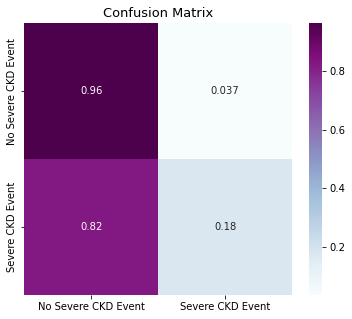

,Base_Imbalanced
Accuracy,0.828283
Precision,0.789454
Recall,0.828283
F1_Score,0.792617
MCC,0.221099


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_scaled, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
logreg_base = grid_search_logreg.best_estimator_

# check the model performance on test data
base_model = performance_evaluation(Xtest_scaled, ytest, logreg_base, 'Base_Imbalanced')

#### Model 2 | Logistic Regression (Base Model) - All Features with Balanced Classes

Best Parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy:  0.848526620717211


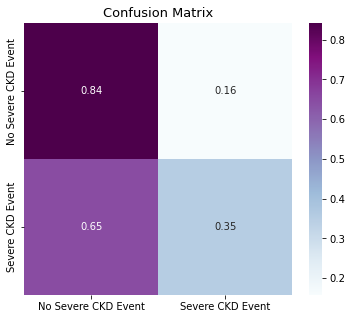

,Base_Balanced
Accuracy,0.757576
Precision,0.768620
Recall,0.757576
F1_Score,0.762813
MCC,0.186173


In [41]:
# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_balanced_scaled, y_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
logreg_base_balanced = grid_search_logreg.best_estimator_

# check the model performance on test data
base_balanced_model = performance_evaluation(Xtest_balanced_scaled, ytest, logreg_base_balanced, 'Base_Balanced')

#### Model 3 | Logistic Regression (Refined) - Selected Features with Balanced Classes

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.8187094196383977


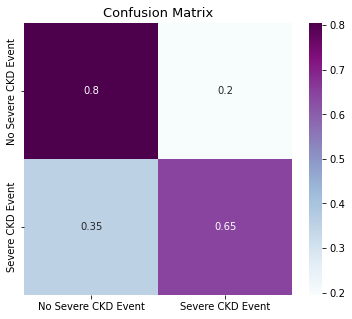

,Refined_Balanced
Accuracy,0.777778
Precision,0.829218
Recall,0.777778
F1_Score,0.795815
MCC,0.382702


In [42]:
# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_selected_scaled, ytrain_selected_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
logreg_refined_balanced = grid_search_logreg.best_estimator_

# check the model performance on test data
refined_balanced_model = performance_evaluation(Xtest_selected_scaled, ytest, logreg_refined_balanced, 'Refined_Balanced')

### Summary of the Predictive Analytics

In [43]:
# compare the key evaluation metrics for 3 models
res = pd.concat([base_model, base_balanced_model, refined_balanced_model], axis=1)

# display the result
res

,Base_Imbalanced,Base_Balanced,Refined_Balanced
Accuracy,0.828283,0.757576,0.777778
Precision,0.789454,0.768620,0.829218
Recall,0.828283,0.757576,0.777778
F1_Score,0.792617,0.762813,0.795815
MCC,0.221099,0.186173,0.382702


In the subsequent phase of the analysis, a logistic regression algorithm was employed to construct a classification model for predicting the likelihood of severe chronic kidney disease (CKD) events in patients. Initially, the model was trained using all available features. However, due to imbalanced classes—where the major class constituted 90% (no severe CKD event) and the minor class 10% (severe CKD event)—the resulting high accuracy of 82.83% was misleading. Despite the seemingly strong accuracy, the low Matthews Correlation Coefficient (MCC) value of 0.2211 indicated poor performance in identifying the severe CKD event (minor class). Examination of the confusion matrix revealed a significant imbalance in the normalized values for the minor class (0.18) compared to the major class (0.96).

To address this imbalance, the Synthetic Minority Over-sampling Technique (SMOTE) was applied, resulting in a more balanced dataset. However, this adjustment led to a decrease in both accuracy (75.76%) and MCC score (0.1862). Nevertheless, the confusion matrix indicated an improvement in identifying the severe CKD event (normalized value: 0.35), compared to the major class (normalized value: 0.84).

To refine the model further, only features identified as statistically significant in the earlier statistical analysis were used for training. This targeted approach resulted in an accuracy of 77.78% and a significantly improved MCC score of 0.3827. The confusion matrix reflected a substantial enhancement in identifying the severe CKD event (normalized value: 0.65) compared to the major class (normalized value: 0.80).

The summarized comparison in the table illustrates the trade-offs between different model configurations. While the initial imbalanced model achieved high accuracy, the refined balanced model, leveraging statistically significant features, struck a better balance between precision, recall, and overall performance, as evidenced by the higher MCC score. These insights underscore the importance of considering not only accuracy but also more robust metrics, especially in the context of imbalanced datasets.

#### Future Directions:

1. Feature Engineering and Selection: Explore further feature engineering techniques to create new variables that might capture additional information or interactions between existing features. Refine feature selection methods to focus on the most relevant predictors for better model interpretability and potentially enhanced performance.

2. Ensemble Methods: Investigate ensemble methods such as Random Forests or Gradient Boosting. Ensemble models can often provide improved predictive performance by combining the strengths of multiple models.

3. Advanced Model Architectures: Experiment with more complex model architectures, such as deep learning models, to capture intricate relationships within the data. Neural networks may uncover patterns that traditional models might overlook.

4. Resampling Techniques: Consider alternative resampling techniques beyond SMOTE, such as ADASYN or Borderline-SMOTE, to address class imbalance and potentially enhance model generalization.

5. Clinical Validation: Collaborate with domain experts or clinicians to validate the model's predictions against clinical knowledge. This can provide valuable insights into the practical utility of the model in a healthcare setting.